In [23]:
#Набор данных: Данные о клиентах магазина
#Источник: https://www.kaggle.com/datasets/datascientistanna/customers-dataset
#Характер данных: реальные

#Атрибуты(название атрибута в датасете - описание атрибута(тип данных атрибута)):
#Customer ID - уникальный идентификатор покупателя(Integer)
#Gender - пол покупателя(String)
#Age - возраст покупателя(Integer)
#Annual Income($) - годовой доход(Integer)
#Spending Score - оценка расходов, присвоенная магазином на основе поведения покупателя и характера расходов(Integer)
#Profession - профессия(String)
#Work Experience(in years) - опыт работы в годах(Integer)
#Family Size - размер семьи(Integer)

#Задача анализа данных: установить соответствие между атрибутами для определения портрета среднестатистического покупателя

import matplotlib.pyplot as plt
import pandas as pnd
import numpy as np
import seaborn as sns
import math

data_set = pnd.read_csv('Customers.csv')

print(data_set)

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0        Healthcare                

In [24]:
columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

print('Среднее значение:')
for col in columns:
    avg = data_set[col].mean()
    print(col, "-", avg)

Среднее значение:
Age - 48.96
Annual Income ($) - 110731.8215
Spending Score (1-100) - 50.9625
Work Experience - 4.1025
Family Size - 3.7685


In [25]:
print('СКО:')

for col in columns:
    data = data_set[col];
    sko = data.std()
    print(sko)

СКО:
28.429747189565955
45739.53668828389
27.934660663469618
3.9222041753070864
1.970748506237525


Text(0.5, 1.0, 'Age distribution')

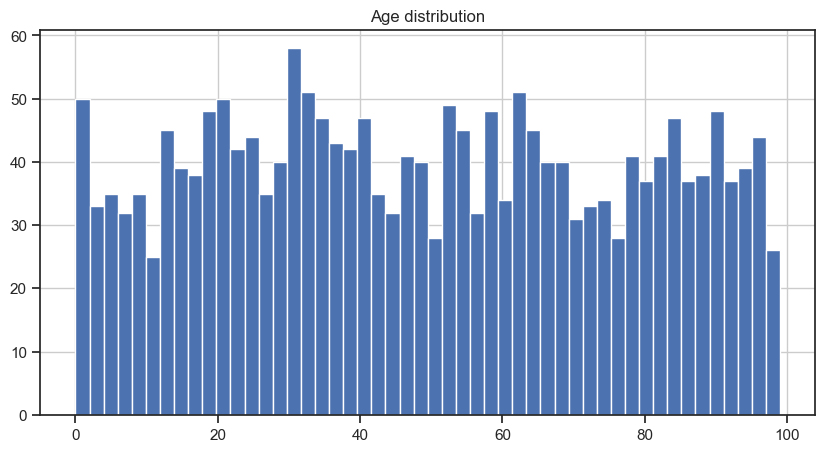

In [26]:
col = columns[0]
plt.figure(figsize=(10,5))
plt.grid("True")
plt.hist(data_set[col], bins=50)
plt.title(col + " distribution")

Text(0.5, 1.0, 'Annual Income ($) distribution')

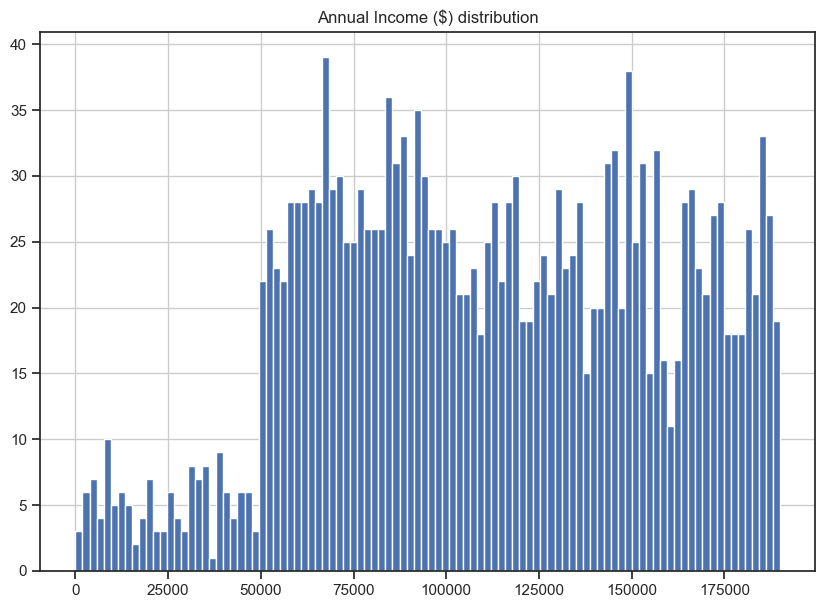

In [27]:
col = columns[1]
plt.figure(figsize=(10,7))
plt.grid("True")
plt.hist(data_set[col], bins=100)
plt.title(col + " distribution")

#Выбросов нет.

Text(0.5, 1.0, 'Spending Score (1-100) distribution')

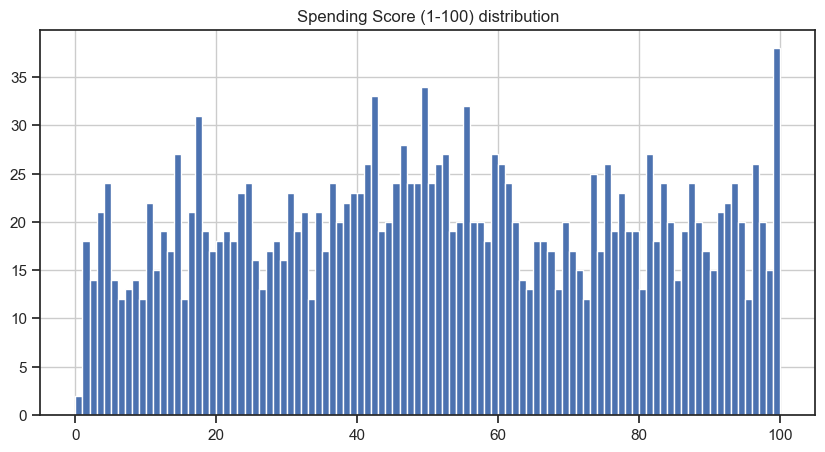

In [28]:
col = columns[2]
plt.figure(figsize=(10,5))
plt.grid("True")
plt.hist(data_set[col], bins=100)
plt.title(col + " distribution")

#Нет выбросов

Text(0.5, 1.0, 'Work Experience distribution')

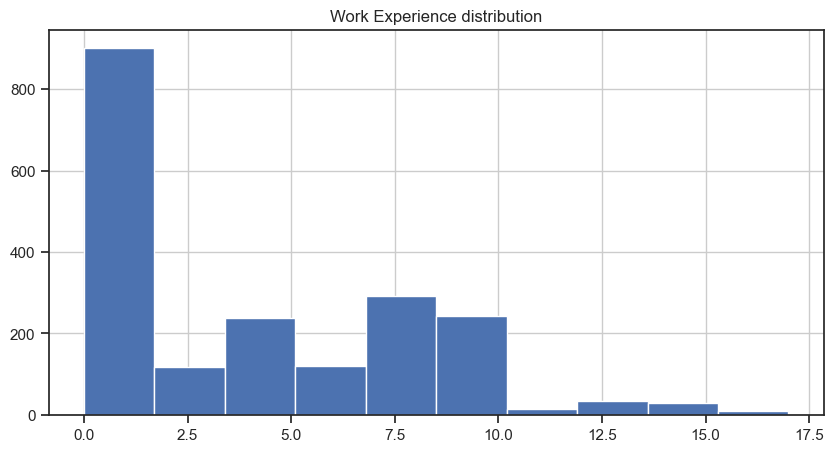

In [29]:
col = columns[3]
plt.figure(figsize=(10,5))
plt.grid("True")
plt.hist(data_set[col], bins=10)
plt.title(col + " distribution")

#Нет выбросов

Text(0.5, 1.0, 'Family Size distribution')

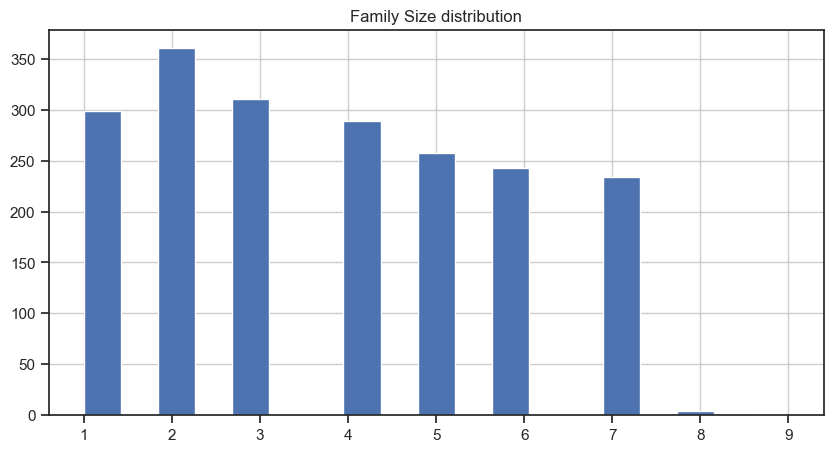

In [30]:
col = columns[4]
plt.figure(figsize=(10,5))
plt.grid("True")
plt.hist(data_set[col], bins=19)
plt.title(col + " distribution")

#Нет выбросов

In [31]:
print("Пропущенные значения:\n")
for col in columns:
    miss = data_set[col].isnull().sum()
    print(col, "-", miss)
print('Profession', "-", data_set['Profession'].isnull().sum())
print('Gender', "-", data_set['Gender'].isnull().sum())

#Варианты обработки пропущенных значений:
#1)Удаление строк с пропущенным значением
#2)Заменить пропущенные значения медианой
#3)Заменить пропущенные значения прогнозируемой величиной

#Есть выбросы - значение 8

Пропущенные значения:

Age - 0
Annual Income ($) - 0
Spending Score (1-100) - 0
Work Experience - 0
Family Size - 0
Profession - 35
Gender - 0


In [32]:
head = data_set.head() 
if 'CustomerID' in head:
    data_set = data_set.drop(columns=['CustomerID', 'Gender', 'Profession'])
data_set[columns].corr()

#Корреляция может быть:
#положительной — когда один показатель растет, другой тоже растет;
#отрицательной — когда одна переменная растет, другая уменьшается;
#нейтральной(0) — изменения не связаны друг с другом.

#Высокая корреляция:
#нет
#Низкая корреляция:
#все корреляции


,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
Age,1.000000,0.021378,-0.041798,-0.014319,0.038254
Annual Income ($),0.021378,1.000000,0.023299,0.089136,0.093005
Spending Score (1-100),-0.041798,0.023299,1.000000,-0.028948,0.002232
Work Experience,-0.014319,0.089136,-0.028948,1.000000,0.011873
Family Size,0.038254,0.093005,0.002232,0.011873,1.000000


Матрица графиков рассеивания:


C:\Users\ivank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


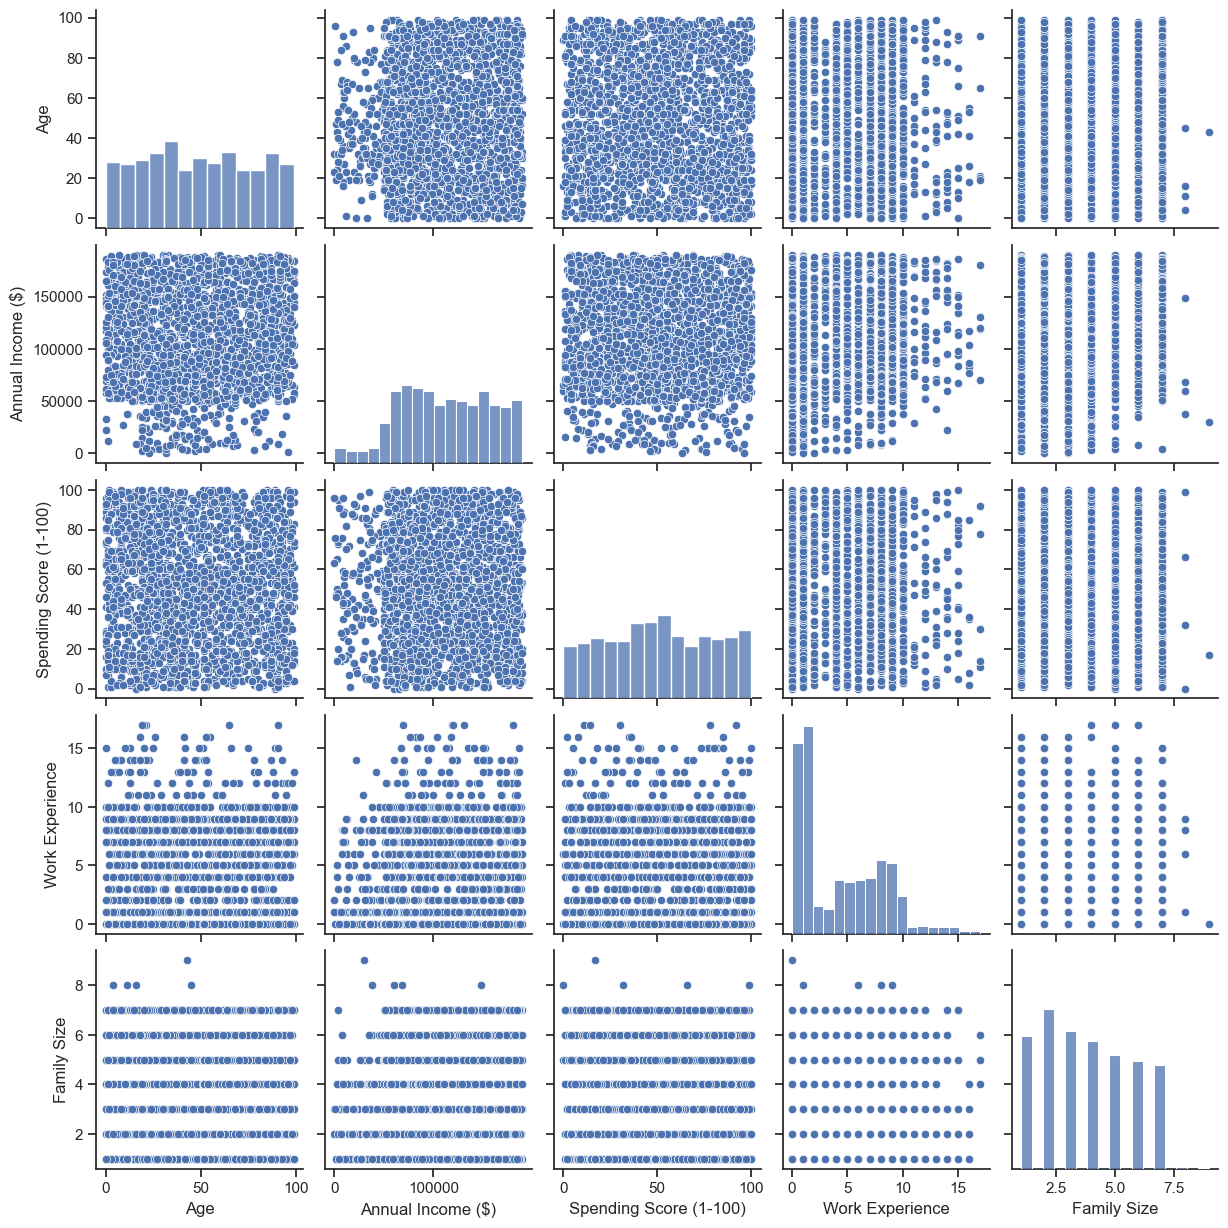

In [33]:
print("Матрица графиков рассеивания:")

sns.pairplot(data_set[columns])


In [22]:
#Анализ результатов результатов:

#Уровень ежегодного дохода покупателей разделен чертой в 50 000 $ в год. Большая часть покупателей получает больше 50 000$ в год,
#меньшинство же получает менее 50 000 $ в год.
#Большая часть покупателей имеет малый опыт работы(0-2 лет)
#Анализ возраста покупателей показал, что магазины посещают люди всех возрастов
#По гистограммам можно оценить среднего покупателя: 
#В основном магазины посещают человек с семьей размером 1-7 человек, доходом около 110 731 $ в год, опытом работы около 4 лет

#Самый интересующий нас атрибут - Spending score(оценка расходов)
#По таблице корреляции можно судить о том, что чем выше годовой доход/размер семьи, тем больше человек тратит в магазинах сети.
#Однако, чем выше возраст человека, тем меньше человек начинает тратить в магазинах